In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

students = pd.read_csv('stud_math.csv')

#Общая информация о датасете
students.info()

#Определим общее количество записей в датасете
students.count()

#Количество уникальных значений в датасете
students.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64

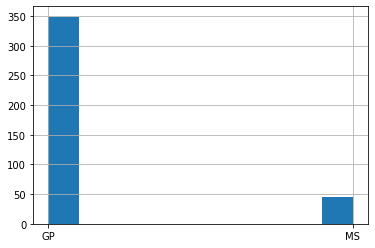

In [2]:
#Анализ столбца school
students.school.hist()

In [3]:
#Анализ значений экзамена по математике по школе GP
school_GP_score = students[students.school == 'GP'][['school','score']]
round(school_GP_score.mean(),2)

score    52.63
dtype: float64

In [4]:
#Анализ значений экзамена по математике по школе MS
school_MS_score = students[students.school == 'MS'][['school', 'score']]
round(school_MS_score.mean(),2)

score    49.44
dtype: float64

Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет

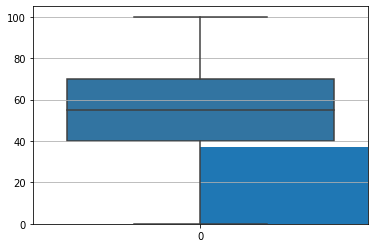

In [237]:
#Проверка на наличие выбросов в столбце score

#Расчет межквартильного размаха
IRQ_score = students['score'].quantile(q=0.75, interpolation='midpoint') - students['score'].quantile(q=0.25, interpolation='midpoint')

#Расчет перцентителей
score_perc25 = students.score.quantile(0.25)
score_perc75 = students.score.quantile(0.75)

#Поиск выбросов
eject_score_low = score_perc25 - 1.5*IRQ_score
eject_score_high = score_perc75 + 1.5*IRQ_score

for i in students['score']:
    if i < eject_score_low:
        print('Выбросы есть')
    elif i > eject_score_high:
        print('Выбросы есть')
    else:
        print('Выбросов нет')

students.score.hist(bins=50)

#Проверим наличие выборосов с использованием графика boxplot
sns.boxplot(data = students.score)

In [6]:
#Формируем новый датасет, исключая из него записи с отсутствующими значениями в столбце score
students = students[~students['score'].isnull()]
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

204

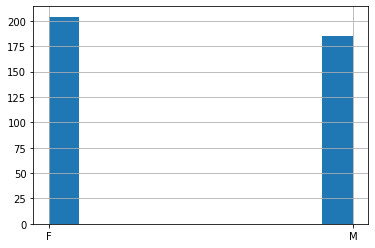

In [7]:
#Анализ столбца sex
students.sex.hist()

#Подсчет количества девушек в новом датасете
female = students[students.sex == 'F']
female.sex.count()

In [8]:
#Подсчет количества мальчиков в новом датасете
male = students[students.sex == 'M']
male.sex.count()

185

In [9]:
#Определение среднего балла по математике среди девушек
round(female.score.mean(),2)

50.1

In [10]:
#Определение среднего балла по математике среди мальчиков
round(male.score.mean(),2)

54.65

In [11]:
#Анализ значений экзамена по математике у девушек по школе GP
female_GP_score = female[female.school == 'GP'][['school','score']]
round(female_GP_score.mean(),2)

score    50.17
dtype: float64

In [12]:
#Анализ значений экзамена по математике у девушек по школе MS
female_MS_score = female[female.school == 'MS'][['school','score']]
round(female_MS_score.mean(),2)

score    49.6
dtype: float64

In [13]:
#Анализ значений экзамена по математике у мальчиков по школе GP
male_GP_score = male[male.school == 'GP'][['school','score']]
round(male_GP_score.mean(),2)

score    55.3
dtype: float64

In [14]:
#Анализ значений экзамена по математике у мальчиков по школе MS
male_MS_score = male[male.school == 'MS'][['school','score']]
round(male_MS_score.mean(),2)

score    49.25
dtype: float64

Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет
Выбросов нет

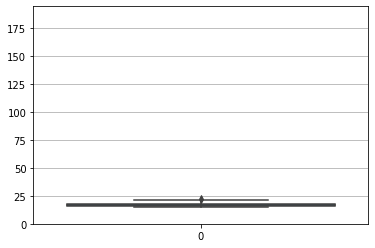

In [240]:
#Анализ столбца age
students.age.hist()

#Расчет межквартильного размаха по столбу age
IRQ_age = students['age'].quantile(q=0.75, interpolation='midpoint') - students['age'].quantile(q=0.25, interpolation='midpoint')

#Расчет перцентителей
age_perc25 = students.age.quantile(0.25)
age_perc75 = students.age.quantile(0.75)

#Поиск выбросов
eject_age_low = age_perc25 - 1.5*IRQ_age
eject_age_high = age_perc75 + 1.5*IRQ_age

for i in students['age']:
    if i < eject_age_low:
        print('Выбросы есть', i)
    elif i > eject_age_high:
        print('Выбросы есть', i)
    else:
        print('Выбросов нет')
        
students.age.hist(bins=5)

sns.boxplot(data = students['age'])

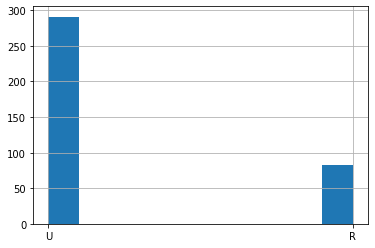

In [17]:
#Анализ столбца address
students.address.hist()

In [18]:
#Подсчет количества проживающих в городе
urban_citizens = students[students.address == 'U']
urban_citizens.address.count()

291

In [19]:
#Подсчет количества проживающих за городом
suburban_citizens = students[students.address == 'R']
suburban_citizens.address.count()

83

In [20]:
#Замена пропусков в столбце address на None
students.address = students.address.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

In [21]:
#Определение среднего балла по математике среди учеников, проживающих в городе
round(urban_citizens.score.mean(),2)

53.57

In [22]:
#Определение среднего балла по математике среди учеников, проживающих за городом
round(suburban_citizens.score.mean(),2)

46.93

In [23]:
#Определение среднего балла по математике среди девушек, проживающих в городе и учащихся в школе GP
round(urban_citizens[(urban_citizens.sex == 'F') & (urban_citizens.school == 'GP')].score.mean(),2)

51.15

In [24]:
#Определение среднего балла по математике среди девушек, проживающих в городе и учащихся в школе MS
round(urban_citizens[(urban_citizens.sex == 'F') & (urban_citizens.school == 'MS')].score.mean(),2)

48.33

In [25]:
#Определение среднего балла по математике среди мальчиков, проживающих в городе и учащихся в школе GP
round(urban_citizens[(urban_citizens.sex == 'M') & (urban_citizens.school == 'GP')].score.mean(),2)

56.43

In [26]:
#Определение среднего балла по математике среди мальчиков, проживающих в городе и учащихся в школе MS
round(urban_citizens[(urban_citizens.sex == 'M') & (urban_citizens.school == 'MS')].score.mean(),2)

56.67

In [27]:
#Определение среднего балла по математике среди девушек, проживающих за городом и учащихся в школе GP
round(suburban_citizens[(suburban_citizens.sex == 'F') & (suburban_citizens.school == 'GP')].score.mean(),2)

46.61

In [28]:
#Определение среднего балла по математике среди девушек, проживающих за городом и учащихся в школе MS
round(suburban_citizens[(suburban_citizens.sex == 'F') & (suburban_citizens.school == 'MS')].score.mean(),2)

45.77

In [29]:
#Определение среднего балла по математике среди мальчиков, проживающих за городом и учащихся в школе GP
round(suburban_citizens[(suburban_citizens.sex == 'M') & (suburban_citizens.school == 'GP')].score.mean(),2)

49.48

In [30]:
#Определение среднего балла по математике среди мальчиков, проживающих за городом и учащихся в школе MS
round(suburban_citizens[(suburban_citizens.sex == 'M') & (suburban_citizens.school == 'MS')].score.mean(),2)

42.0

107

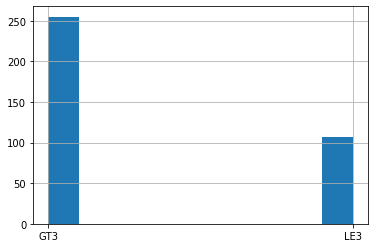

In [31]:
#Анализ столбца famsize (размер семьи)
students.famsize.hist()

##Замена пропусков в столбце famsize на None
students.famsize = students.famsize.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

#Подсчет количества семей с одним ребенком
small_family = students[students.famsize == 'LE3']
small_family.famsize.count()

In [32]:
#Подсчет количества семей с более чем одним ребенком
big_family = students[students.famsize == 'GT3']
big_family.famsize.count()

255

In [33]:
#Определение среднего балла по математике среди учеников, проживающих в условно маленьких семьях
round(small_family.score.mean(),2)

54.67

In [34]:
#Определение среднего балла по математике среди учеников, проживающих в условно больших семьях
round(big_family.score.mean(),2)

51.51

In [35]:
#Определение среднего балла по математике среди девушек из маленьких семей, проживающих в городе и учащихся в школе GP
round(small_family[(small_family.sex == 'F') & (small_family.school == 'GP') & (small_family.address == 'U')].score.mean(),2)

51.47

In [36]:
#Определение среднего балла по математике среди девушек из маленьких семей, проживающих в городе и учащихся в школе MS
round(small_family[(small_family.sex == 'F') & (small_family.school == 'MS') & (small_family.address == 'U')].score.mean(),2)

53.75

In [37]:
#Определение среднего балла по математике среди девушек из маленьких семей, проживающих за городом и учащихся в школе GP
round(small_family[(small_family.sex == 'F') & (small_family.school == 'GP') & (small_family.address == 'R')].score.mean(),2)

62.5

In [38]:
#Определение среднего балла по математике среди девушек из маленьких семей, проживающих за городом и учащихся в школе MS
round(small_family[(small_family.sex == 'F') & (small_family.school == 'MS') & (small_family.address == 'R')].score.mean(),2)

72.5

In [39]:
#Определение среднего балла по математике среди мальчиков из маленьких семей, проживающих в городе и учащихся в школе GP
round(small_family[(small_family.sex == 'M') & (small_family.school == 'GP') & (small_family.address == 'U')].score.mean(),2)

56.41

In [40]:
#Определение среднего балла по математике среди мальчиков из маленьких семей, проживающих в городе и учащихся в школе MS
round(small_family[(small_family.sex == 'M') & (small_family.school == 'MS') & (small_family.address == 'U')].score.mean(),2)

54.17

In [41]:
#Определение среднего балла по математике среди мальчиков из маленьких семей, проживающих за городом и учащихся в школе GP
round(small_family[(small_family.sex == 'M') & (small_family.school == 'GP') & (small_family.address == 'R')].score.mean(),2)

47.14

In [42]:
#Определение среднего балла по математике среди мальчиков из маленьких семей, проживающих за городом и учащихся в школе MS
round(small_family[(small_family.sex == 'M') & (small_family.school == 'MS') & (small_family.address == 'R')].score.mean(),2)

56.67

In [43]:
#Определение среднего балла по математике среди девушек из больших семей, проживающих в городе и учащихся в школе GP
round(big_family[(big_family.sex == 'F') & (big_family.school == 'GP') & (big_family.address == 'U')].score.mean(),2)

51.39

In [44]:
#Определение среднего балла по математике среди девушек из больших семей, проживающих в городе и учащихся в школе MS
round(big_family[(big_family.sex == 'F') & (big_family.school == 'MS') & (big_family.address == 'U')].score.mean(),2)

44.0

In [45]:
#Определение среднего балла по математике среди девушек из больших семей, проживающих за городом и учащихся в школе GP
round(big_family[(big_family.sex == 'F') & (big_family.school == 'GP') & (big_family.address == 'R')].score.mean(),2)

42.8

In [46]:
#Определение среднего балла по математике среди девушек из больших семей, проживающих за городом и учащихся в школе MS
round(big_family[(big_family.sex == 'F') & (big_family.school == 'MS') & (big_family.address == 'R')].score.mean(),2)

42.78

In [47]:
#Определение среднего балла по математике среди мальчиков из больших семей, проживающих в городе и учащихся в школе GP
round(big_family[(big_family.sex == 'M') & (big_family.school == 'GP') & (big_family.address == 'U')].score.mean(),2)

56.75

In [48]:
#Определение среднего балла по математике среди мальчиков из больших семей, проживающих в городе и учащихся в школе MS
round(big_family[(big_family.sex == 'M') & (big_family.school == 'MS') & (big_family.address == 'U')].score.mean(),2)

61.67

In [49]:
#Определение среднего балла по математике среди мальчиков из больших семей, проживающих за городом и учащихся в школе GP
round(big_family[(big_family.sex == 'M') & (big_family.school == 'GP') & (big_family.address == 'R')].score.mean(),2)

50.0

In [50]:
#Определение среднего балла по математике среди мальчиков из больших семей, проживающих за городом и учащихся в школе MS
round(big_family[(big_family.sex == 'M') & (big_family.school == 'MS') & (big_family.address == 'R')].score.mean(),2)

35.71

308

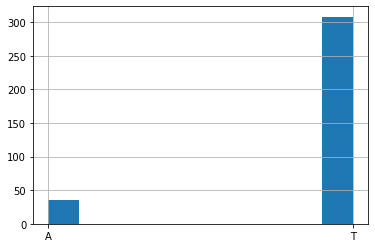

In [51]:
#Анализ столбца Pstatus
students.Pstatus.hist()

##Замена пропусков в столбце Pstatus на None
students.Pstatus = students.Pstatus.astype(str).apply(lambda x: None if x.strip() == 'nan' else x)

#Подсчет количества семей, живущих вместе
parents_status_T = students[students.Pstatus == 'T']
parents_status_T.Pstatus.count()

In [52]:
#Подсчет количества семей, живущих раздельно
parents_status_A = students[students.Pstatus == 'A']
parents_status_A.Pstatus.count()

36

In [53]:
#Определение среднего балла по математике среди учеников, проживающих в полных семьях
round(parents_status_T.score.mean(),2)

51.7

In [54]:
#Определение среднего балла по математике среди учеников, проживающих в неполных семьях
round(parents_status_A.score.mean(),2)

55.14

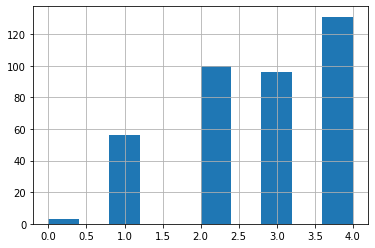

In [55]:
#Исключение из столбца отсутствующих значений
students_Medu = students[~students['Medu'].isnull()]

#Анализ столбца Medu
students.Medu.hist()

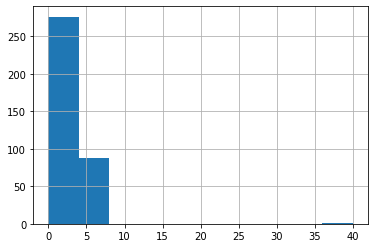

In [56]:
#Исключение из столбца отсутствующих значений
students_Fedu = students[~students['Fedu'].isnull()]

#Анализ столбца Fedu
students.Fedu.hist()

0     55
1     32
2     98
3     58
4    127
dtype: int64

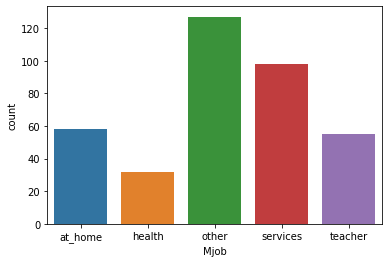

In [97]:
#Анализ столбцов Mjob и Fjob

#Подсчет количества матерей, занимающихся той или иной деятельностью
mother_teacher = students[students.Mjob == 'teacher'].Mjob.count()
mother_health = students[students.Mjob == 'health'].Mjob.count()
mother_services = students[students.Mjob == 'services'].Mjob.count()
mother_at_home = students[students.Mjob == 'at_home'].Mjob.count()
mother_other = students[students.Mjob == 'other'].Mjob.count()

mother_job = pd.Series([mother_teacher,mother_health,mother_services,mother_at_home,mother_other])
display(mother_job)

sns.countplot(x = 'Mjob', data = students)

0     29
1     15
2     99
3     16
4    194
dtype: int64

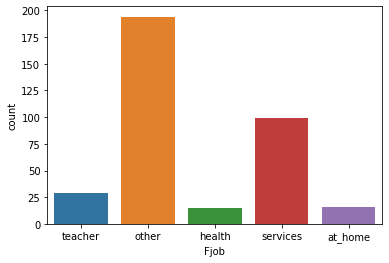

In [96]:
#Подсчет количества отцов, занимающихся той или иной деятельностью
father_teacher = students[students.Fjob == 'teacher'].Fjob.count()
father_health = students[students.Fjob == 'health'].Fjob.count()
father_services = students[students.Fjob == 'services'].Fjob.count()
father_at_home = students[students.Fjob == 'at_home'].Fjob.count()
father_other = students[students.Fjob == 'other'].Fjob.count()

father_job = pd.Series([father_teacher,father_health,father_services,father_at_home,father_other])
display(father_job)

sns.countplot(x = 'Fjob', data = students)

In [63]:
#Определение среднего балла по математике среди учеников, у которых матери работают учителями
round(students[students.Mjob == 'teacher'].score.mean(),2)

55.18

In [65]:
#Определение среднего балла по математике среди учеников, у которых матери не работают
round(students[students.Mjob == 'at_home'].score.mean(),2)

45.69

In [66]:
#Определение среднего балла по математике среди учеников, у которых отцы работают учителями
round(students[students.Fjob == 'teacher'].score.mean(),2)

59.83

In [67]:
#Определение среднего балла по математике среди учеников, у которых отцы не работают
round(students[students.Fjob == 'at_home'].score.mean(),2)

51.88

In [68]:
#Определение среднего балла по математике среди учеников, у которых оба родителя работают учителями
round(students[(students.Mjob == 'teacher') & (students.Fjob == 'teacher')].score.mean(),2)

66.36

In [69]:
#Определение среднего балла по математике среди учеников, у которых оба родителя не работают
round(students[(students.Mjob == 'at_home') & (students.Fjob == 'at_home')].score.mean(),2)

61.0

In [73]:
#Подсчет количества семей, в которых оба родителя работают учителями (подсчет будем вести по столбцу school как полному)
parents_teachers = students[(students.Mjob == 'teacher') & (students.Fjob == 'teacher')].school.count()
display(parents_teachers)

11

0    101
1    102
2    135
3     34
dtype: int64

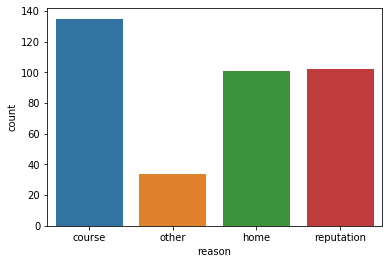

In [94]:
#Анализ столбца Reason

#Удаление пустых записей
reason = students[~students['reason'].isnull()]

#Подсчет количества причин, по которым выбрана та или иная школа
reason_home = reason[reason.reason == 'home'].reason.count()
reason_reputation = reason[reason.reason == 'reputation'].reason.count()
reason_course = reason[reason.reason == 'course'].reason.count()
reason_other = reason[reason.reason == 'other'].reason.count()

reason_why = pd.Series([reason_home, reason_reputation, reason_course, reason_other])
display(reason_why)

sns.countplot(x = 'reason', data = reason)

In [89]:
#Определение среднего балла по математике среди учеников, родители которых выбрали школу из-за её образовательной программы
round(reason[reason.reason == 'course'].score.mean(),2)

49.81

In [90]:
#Определение среднего балла по математике среди учеников, родители которых выбрали школу из-за её репутации
round(reason[reason.reason == 'reputation'].score.mean(),2)

55.64

In [92]:
#Определение среднего балла по математике среди учеников, родители которых выбрали школу из-за её близости к дому
round(reason[reason.reason == 'home'].score.mean(),2)

51.19

0    248
1     86
2     24
dtype: int64

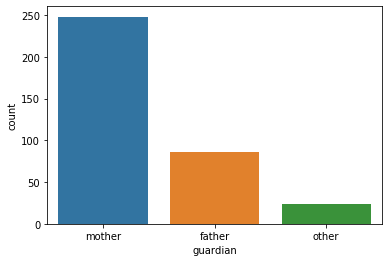

In [107]:
#Анализ столбца guardian

#Удаление пустых записей
guardian = students[~students['guardian'].isnull()]

#Подсчет значений в столбце guardian
guardian_mother = guardian[guardian.guardian == 'mother'].guardian.count()
guardian_father = guardian[guardian.guardian == 'father'].guardian.count()
guardian_other = guardian[guardian.guardian == 'other'].guardian.count()

guardians = pd.Series([guardian_mother, guardian_father, guardian_other])
display(guardians)

sns.countplot(x = 'guardian', data = guardian)

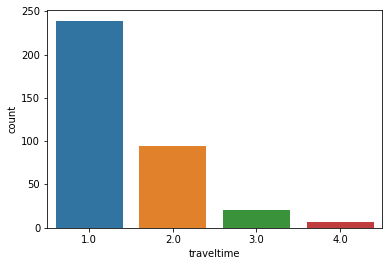

In [242]:
#Анализ столбца traveltime

#Удаление пустых записей
traveltime = students[~students['traveltime'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'traveltime', data = traveltime)

In [110]:
#Определение среднего балла по математике среди учеников, добирающихся до школы менее 15 мин.
round(traveltime[traveltime.traveltime == 1].score.mean(),2)

53.58

In [111]:
#Определение среднего балла по математике среди учеников, добирающихся до школы от 15 до 30 мин.
round(traveltime[traveltime.traveltime == 2].score.mean(),2)

51.76

studytime
1.0    103
2.0    189
3.0     63
4.0     27
Name: score, dtype: int64

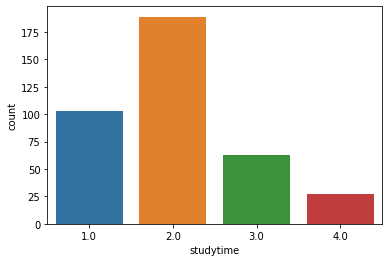

In [142]:
#Анализ столбца studytime

#Удаление пустых записей
students_studytime = students[~students['studytime'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'studytime', data = students_studytime)

students_studytime.groupby(['studytime'])['score'].count()

In [143]:
#Определение среднего балла по группе учеников, внешкольная нагрузка которых составляет менее 2 часов
round(students_studytime[students_studytime.studytime == 1].score.mean(),2)

49.47

In [144]:
#Определение среднего балла по группе учеников, внешкольная нагрузка которых составляет от 2 до 5 часов
round(students_studytime[students_studytime.studytime == 2].score.mean(),2)

50.82

In [145]:
#Определение среднего балла по группе учеников, внешкольная нагрузка которых составляет от 5 до 10 часов
round(students_studytime[students_studytime.studytime == 3].score.mean(),2)

57.78

In [146]:
#Определение среднего балла по группе учеников, внешкольная нагрузка которых составляет более 10 часов
round(students_studytime[students_studytime.studytime == 4].score.mean(),2)

56.3

failures
0.0    290
1.0     48
2.0     15
3.0     14
Name: score, dtype: int64

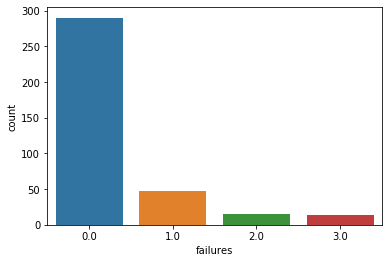

In [148]:
#Анализ столбца failures

#Удаление пустых записей
students_failures = students[~students['failures'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'failures', data = students_failures)

students_failures.groupby(['failures'])['score'].count()

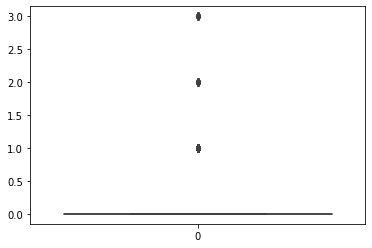

In [244]:
#Проверка наличия выбросов
sns.boxplot(data = students_failures.failures)

In [150]:
#Определение среднего балла по группе учеников, у которых количество внеучебных неудач равняется 2
round(students_failures[students_failures.failures == 2].score.mean(),2)

32.33

In [151]:
#Определение среднего балла по группе учеников, у которых количество внеучебных неудач равняется 3
round(students_failures[students_failures.failures == 3].score.mean(),2)

29.64

In [153]:
#Определение среднего балла по группе учеников, у которых количество внеучебных неудач равняется 0 или 1
round(students_failures[(students_failures.failures == 0) | (students_failures.failures == 1)].score.mean(),2)

53.77

schoolsup
no     331
yes     49
Name: score, dtype: int64

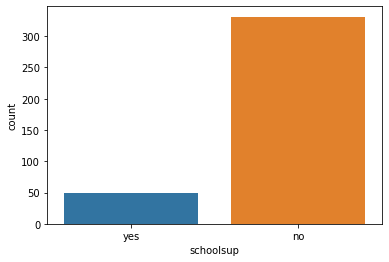

In [156]:
#Анализ столбца schoolsup

#Удаление пустых записей
students_schoolsup = students[~students['schoolsup'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'schoolsup', data = students_schoolsup)

students_schoolsup.groupby(['schoolsup'])['score'].count()

In [157]:
#Определение среднего балла по группе учеников, у которых была дополнительная школьная поддержка
round(students_schoolsup[students_schoolsup.schoolsup == 'yes'].score.mean(),2)

47.04

In [158]:
#Определение медианного значения балла по группе учеников, у которых была дополнительная школьная поддержка
round(students_schoolsup[students_schoolsup.schoolsup == 'yes'].score.median(),2)

50.0

famsup
no     135
yes    216
Name: score, dtype: int64

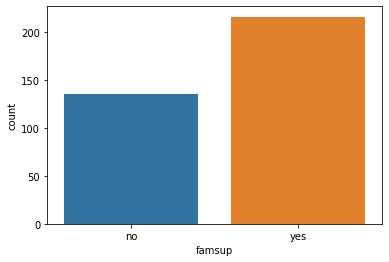

In [159]:
#Анализ столбца famsup

#Удаление пустых записей
students_famsup = students[~students['famsup'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'famsup', data = students_famsup)

students_famsup.groupby(['famsup'])['score'].count()

In [161]:
#Определение среднего балла по группе учеников, у которых была дополнительная семейная поддержка
round(students_famsup[students_famsup.famsup == 'yes'].score.mean(),2)

51.71

In [162]:
#Определение среднего балла по группе учеников, у которых не было дополнительной семейной поддержки
round(students_famsup[students_famsup.famsup == 'no'].score.mean(),2)

52.07

paid
no     197
yes    153
Name: score, dtype: int64

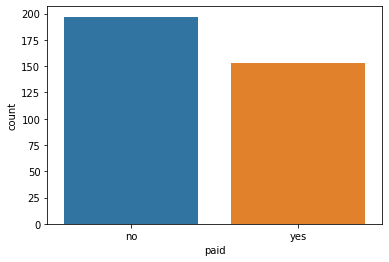

In [163]:
#Анализ столбца paid

#Удаление пустых записей
students_paid = students[~students['paid'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'paid', data = students_paid)

students_paid.groupby(['paid'])['score'].count()

In [164]:
#Определение среднего балла по группе учеников, которые оплачивали дополнительные занятия по математике
round(students_paid[students_paid.paid == 'yes'].score.mean(),2)

55.0

In [165]:
#Определение среднего балла по группе учеников, которые не оплачивали дополнительные занятия по математике
round(students_paid[students_paid.paid == 'no'].score.mean(),2)

50.36

activities
no     166
yes    171
Name: score, dtype: int64

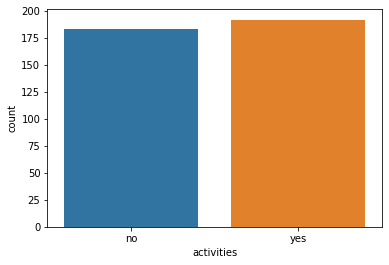

In [166]:
#Анализ столбца activities

#Удаление пустых записей
students_activities = students[~students['activities'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'activities', data = students_activities)

students_paid.groupby(['activities'])['score'].count()

In [167]:
#Определение среднего балла по группе учеников, у которых были дополнительные внеучебные занятия
round(students_activities[students_activities.activities == 'yes'].score.mean(),2)

52.68

In [169]:
#Определение среднего балла по группе учеников, у которых не было дополнительных внеучебных занятий
round(students_activities[students_activities.activities == 'no'].score.mean(),2)

52.19

In [170]:
#Определение медианного значения балла по группе учеников, у которых были дополнительные внеучебные занятия
round(students_activities[students_activities.activities == 'yes'].score.median(),2)

55.0

In [172]:
#Определение медианного значения балла по группе учеников, у которых не было дополнительных внеучебных занятий
round(students_activities[students_activities.activities == 'no'].score.median(),2)

55.0

nursery
no      77
yes    297
Name: score, dtype: int64

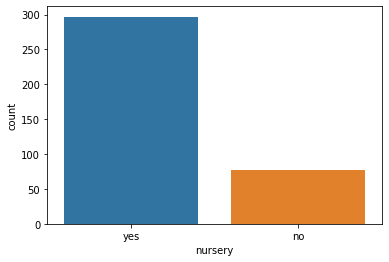

In [173]:
#Анализ столбца nursery

#Удаление пустых записей
students_nursery = students[~students['nursery'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'nursery', data = students_nursery)

students_nursery.groupby(['nursery'])['score'].count()

In [174]:
#Определение среднего балла по группе учеников, которые посещали детский сад
round(students_nursery[students_nursery.activities == 'yes'].score.mean(),2)

52.97

In [175]:
#Определение среднего балла по группе учеников, которые не посещали детский сад
round(students_nursery[students_nursery.activities == 'no'].score.mean(),2)

52.19

In [176]:
#Определение медианного значения балла по группе учеников, которые посещали детский сад
round(students_nursery[students_nursery.activities == 'yes'].score.median(),2)

55.0

In [178]:
#Определение медианного значения балла по группе учеников, которые не посещали детский сад
round(students_nursery[students_nursery.activities == 'no'].score.median(),2)

55.0

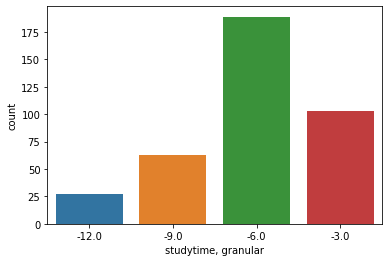

In [122]:
#Анализ столбца studytime, granular

#Удаление пустых записей
students_studytime_granular = students[~students['studytime, granular'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'studytime, granular', data = students_studytime_granular)

higher
no      19
yes    350
Name: score, dtype: int64

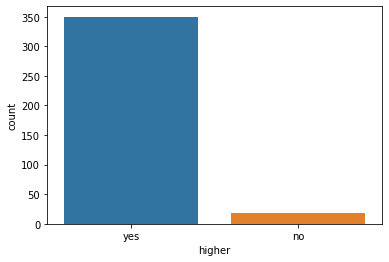

In [179]:
#Анализ столбца higher

#Удаление пустых записей
students_higher = students[~students['higher'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'higher', data = students_higher)

students_higher.groupby(['higher'])['score'].count()

In [180]:
#Определение среднего балла по группе учеников, которые не хотят получить высшее образование
round(students_higher[students_higher.higher == 'no'].score.mean(),2)

33.68

In [181]:
#Определение медианного балла по группе учеников, которые не хотят получить высшее образование
round(students_higher[students_higher.higher == 'no'].score.median(),2)

40.0

internet
no      55
yes    300
Name: score, dtype: int64

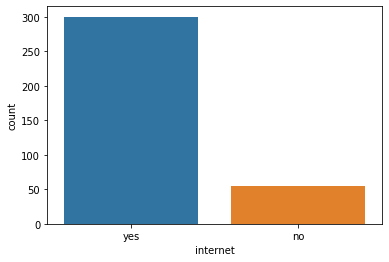

In [182]:
#Анализ столбца internet

#Удаление пустых записей
students_internet = students[~students['internet'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'internet', data = students_internet)

students_internet.groupby(['internet'])['score'].count()

In [183]:
#Определение среднего балла по группе учеников, у которых есть Интернет дома
round(students_internet[students_internet.internet == 'yes'].score.mean(),2)

53.12

In [184]:
#Определение среднего балла по группе учеников, у которых нет Интернета дома
round(students_internet[students_internet.internet == 'no'].score.mean(),2)

49.09

In [185]:
#Определение медианы по группе учеников, у которых есть Интернет дома
round(students_internet[students_internet.internet == 'yes'].score.median(),2)

55.0

In [186]:
#Определение медианы по группе учеников, у которых нет Интернета дома
round(students_internet[students_internet.internet == 'no'].score.median(),2)

50.0

romantic
no     235
yes    123
Name: score, dtype: int64

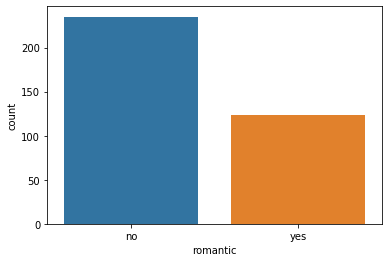

In [187]:
#Анализ столбца romantic

#Удаление пустых записей
students_romantic = students[~students['romantic'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'romantic', data = students_romantic)

students_romantic.groupby(['romantic'])['score'].count()

In [188]:
#Определение среднего балла по группе учеников, которые состоят в романтических отношениях
round(students_romantic[students_romantic.romantic == 'yes'].score.mean(),2)

47.68

In [189]:
#Определение среднего балла по группе учеников, которые не состоят в романтических отношениях
round(students_romantic[students_romantic.romantic == 'no'].score.mean(),2)

54.57

In [190]:
#Определение медианы по группе учеников, которые состоят в романтических отношениях
round(students_romantic[students_romantic.romantic == 'yes'].score.median(),2)

55.0

In [191]:
#Определение среднего балла по группе учеников, которые не состоят в романтических отношениях
round(students_romantic[students_romantic.romantic == 'no'].score.median(),2)

55.0

famrel
1.0      7
2.0     17
3.0     62
4.0    178
5.0     97
Name: score, dtype: int64

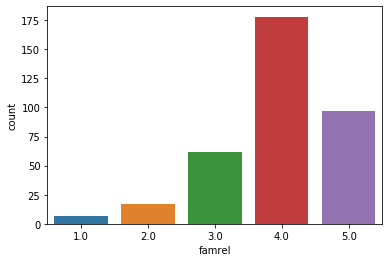

In [193]:
#Анализ столбца famrel

#Удаление пустых записей
students_famrel = students[~students['famrel'].isnull()]
students_famrel = students_famrel[(students_famrel['famrel'] != -1)]

#Проверка распределения значений по столбцу
sns.countplot(x = 'famrel', data = students_famrel)

students_famrel.groupby(['famrel'])['score'].count()

In [195]:
#Определение среднего балла по группе учеников, которые негативно оценивают отношения в семье
round(students_famrel[(students_famrel.famrel == 1) | (students_famrel.famrel == 2)].score.mean(),2)

50.42

In [196]:
#Определение медианы по группе учеников, которые негативно оценивают отношения в семье
round(students_famrel[(students_famrel.famrel == 1) | (students_famrel.famrel == 2)].score.median(),2)

57.5

In [197]:
#Определение максимального балла по группе учеников, которые негативно оценивают отношения в семье
round(students_famrel[(students_famrel.famrel == 1) | (students_famrel.famrel == 2)].score.max(),2)

85.0

In [199]:
#Определение минимального балла по группе учеников, которые негативно оценивают отношения в семье
round(students_famrel[(students_famrel.famrel == 1) | (students_famrel.famrel == 2)].score.min(),2)

0.0

freetime
1.0     18
2.0     63
3.0    152
4.0    110
5.0     37
Name: score, dtype: int64

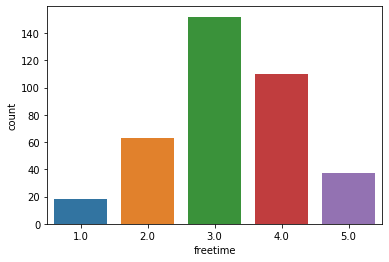

In [200]:
#Анализ столбца freetime

#Удаление пустых записей
students_freetime = students[~students['freetime'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'freetime', data = students_freetime)

students_freetime.groupby(['freetime'])['score'].count()

In [201]:
#Определение среднего балла по группе учеников, у которых мало свободного времени после школы
round(students_freetime[(students_freetime.freetime == 1) | (students_freetime.freetime == 2)].score.mean(),2)

55.49

In [202]:
#Определение среднего балла по группе учеников, у которых много свободного времени после школы
round(students_freetime[(students_freetime.freetime == 4) | (students_freetime.freetime == 5)].score.mean(),2)

53.57

goout
1.0     23
2.0    101
3.0    126
4.0     81
5.0     51
Name: score, dtype: int64

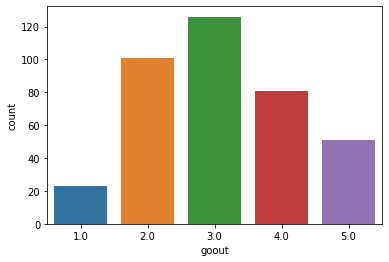

In [203]:
#Анализ столбца goout

#Удаление пустых записей
students_goout = students[~students['goout'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'goout', data = students_goout)

students_goout.groupby(['goout'])['score'].count()

In [204]:
#Определение среднего балла по группе учеников, которые очень мало свободного времени проводят с друзьями
round(students_goout[students_goout.goout == 1].score.mean(),2)

49.35

In [206]:
#Определение медианы значений баллов по группе учеников, которые очень мало свободного времени проводят с друзьями
round(students_goout[students_goout.goout == 1].score.median(),2)

55.0

In [208]:
#Определение максимального значения баллов по группе учеников, которые очень мало свободного времени проводят с друзьями
round(students_goout[students_goout.goout == 1].score.max(),2)

85.0

In [209]:
#Определение минимального значения баллов по группе учеников, которые очень мало свободного времени проводят с друзьями
round(students_goout[students_goout.goout == 1].score.min(),2)

0.0

In [205]:
#Определение среднего балла по группе учеников, которые очень много свободного времени проводят с друзьями
round(students_goout[students_goout.goout == 5].score.mean(),2)

44.51

In [207]:
#Определение медианы значений баллов по группе учеников, которые очень много свободного времени проводят с друзьями
round(students_goout[students_goout.goout == 5].score.median(),2)

50.0

In [211]:
#Определение максимального значения баллов по группе учеников, которые очень много свободного времени проводят с друзьями
round(students_goout[students_goout.goout == 5].score.max(),2)

90.0

In [210]:
#Определение минимального значения баллов по группе учеников, которые очень много свободного времени проводят с друзьями
round(students_goout[students_goout.goout == 5].score.min(),2)

0.0

health
1.0     47
2.0     42
3.0     88
4.0     60
5.0    137
Name: score, dtype: int64

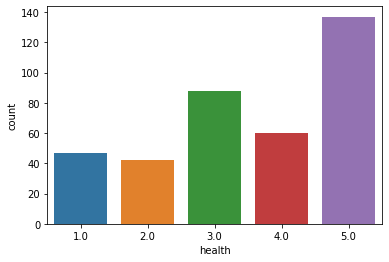

In [214]:
#Анализ столбца health

#Удаление пустых записей
students_health = students[~students['health'].isnull()]

#Проверка распределения значений по столбцу
sns.countplot(x = 'health', data = students_health)

students_health.groupby(['health'])['score'].count()

In [215]:
#Определение среднего балла по группе учеников, c очень плохим и плохим здоровьем
round(students_health[(students_health.health == 1) | (students_health.health == 2)].score.mean(),2)

56.18

In [220]:
#Определение медианного значения балла по группе учеников, c очень плохим и плохим здоровьем
round(students_health[(students_health.health == 1) | (students_health.health == 2)].score.median(),2)

60.0

In [216]:
#Определение среднего балла по группе учеников, cо средним здоровьем
round(students_health[students_health.health == 3].score.mean(),2)

50.62

In [217]:
#Определение среднего балла по группе учеников, c хорошим здоровьем
round(students_health[students_health.health == 4].score.mean(),2)

50.83

In [218]:
#Определение среднего балла по группе учеников, c очень хорошим здоровьем
round(students_health[students_health.health == 5].score.mean(),2)

52.19

In [219]:
#Определение медианного значения баллов по группе учеников, c очень хорошим здоровьем
round(students_health[students_health.health == 5].score.median(),2)

55.0

In [251]:
#Анализ столбца absences

#Удаление пустых записей
students_absences = students[~students['absences'].isnull()]

#Проверка распределения значений по столбцу
students_absences.groupby(['absences'])['score'].count()

absences
0.0      110
1.0        3
2.0       60
3.0        7
4.0       52
5.0        5
6.0       30
7.0        6
8.0       20
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: score, dtype: int64

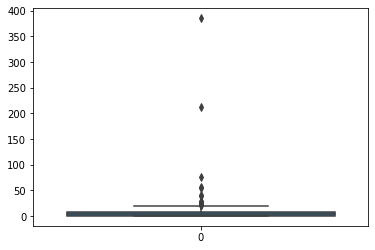

In [249]:
#Поиск выбросов
sns.boxplot (data = students_absences.absences)

In [255]:
#Расчет межквартильного размаха по столбу absences
IRQ_absences = students['absences'].quantile(q=0.75, interpolation='midpoint') - students['absences'].quantile(q=0.25, interpolation='midpoint')

#Расчет перцентителей
absences_perc25 = students.absences.quantile(0.25)
absences_perc75 = students.absences.quantile(0.75)

#Поиск границ выбросов
eject_absences_low = absences_perc25 - 1.5*IRQ_absences
eject_absences_high = absences_perc75 + 1.5*IRQ_absences

display(eject_absences_low, eject_absences_high)

-12.0

20.0

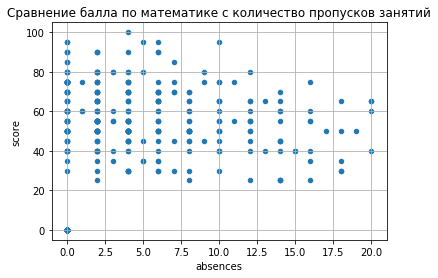

In [258]:
#Построение графика распределения оценок на экзамене по математике в зависимости от количества пропущенных занятий
students_normal_absences = students_absences[students_absences.absences <= 20]

students_normal_absences.plot(x = 'absences', y = 'score', kind = 'scatter', grid = True, title = 'Сравнение балла по математике с количество пропусков занятий')

In [236]:
#Проверим корреляцию между оценкой на экзамене по математике и прочими показателями
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.132182,0.073146,-0.018227,0.205919,0.018227,0.060414,0.016099,0.121115,-0.068103,0.096628,-0.155726
Medu,-0.146736,1.000000,0.270754,-0.165838,0.081032,-0.240319,-0.081032,0.000602,0.038265,0.072320,-0.048331,-0.014047,0.213349
Fedu,-0.132182,0.270754,1.000000,0.038990,0.059618,-0.150023,-0.059618,0.045665,-0.062377,-0.019312,0.024861,0.003762,0.078573
traveltime,0.073146,-0.165838,0.038990,1.000000,-0.105910,0.049738,0.105910,-0.027395,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,0.059618,-0.105910,1.000000,-0.181947,-1.000000,0.046249,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,-0.150023,0.049738,-0.181947,1.000000,0.181947,-0.034836,0.091608,0.107747,0.088013,0.058166,-0.344338
"studytime, granular",0.018227,-0.081032,-0.059618,0.105910,-1.000000,0.181947,1.000000,-0.046249,0.125066,0.053831,0.079180,0.025707,-0.115741
famrel,0.060414,0.000602,0.045665,-0.027395,0.046249,-0.034836,-0.046249,1.000000,0.174193,0.076387,0.080089,-0.082489,0.057112
freetime,0.016099,0.038265,-0.062377,-0.026299,-0.125066,0.091608,0.125066,0.174193,1.000000,0.296338,0.064315,0.010745,0.019026
goout,0.121115,0.072320,-0.019312,0.032629,-0.053831,0.107747,0.053831,0.076387,0.296338,1.000000,-0.018026,-0.047954,-0.129685
